In [7]:
import csv
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from numpy import array

plt.rcParams['figure.figsize']  = 12, 7.5
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family']     = 'serif'
plt.rcParams['font.weight']     = 'bold'
plt.rcParams['font.size']       = 15
plt.rcParams['font.sans-serif'] = 'serif'
plt.rcParams['text.usetex']     = True
plt.rcParams['axes.linewidth']  = 1.5
plt.rcParams['axes.titlesize']  = 'medium'
plt.rcParams['axes.labelsize']  = 'medium'

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.major.pad']  = 8
plt.rcParams['xtick.minor.pad']  = 8
plt.rcParams['xtick.color']      = 'k'
plt.rcParams['xtick.labelsize']  = 'medium'
plt.rcParams['xtick.direction']  = 'in'

plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.major.pad']  = 8
plt.rcParams['ytick.minor.pad']  = 8
plt.rcParams['ytick.color']      = 'k'
plt.rcParams['ytick.labelsize']  = 'medium'
plt.rcParams['ytick.direction']  = 'in'


In [8]:
#formula for conversion of resistance(in ohms) into temperature (in degree celsius)
def PQMS_RTD_formula (R):

    if (R >= 100):
        Z1 = -3.9083e-3
        Z2 = 17.58480889e-6
        Z3 = -23.10e-9
        Z4 = -1.155e-6
        return (Z1 + np.sqrt (Z2 + Z3 * R)) / Z4

    else:
        A_0 = -242.02
        A_1 = 2.2228
        A_2 = 2.5859e-3
        A_3 = -4.8260e-6
        A_4 = -2.8183e-8
        A_5 = 1.5243e-10
        return A_0 + A_1*R + A_2*R*R + A_3*R*R*R + A_4*R*R*R*R + A_5*R*R*R*R*R
    

In [13]:
#function for reading the .csv file
def import_qda_data(filename):
    """Returns Pandas data frame of data contained within a file
    exported from iQ.
    
    Keyword arguments:
    filename -- the name of the data file
    """
    #skips the header rows
    skiprange = np.arange(0, 23)
    skiprange = np.append(skiprange, 24)

    
    df = pd.read_csv(filename, skiprows=skiprange, )
   
    return df

run = import_qda_data('day7_comp_temp.csv')

#function to store the values in list (except null) and also the corresponding time (takes column as input)
def fridge_func(input_list):
    data_list = []
    time_list = []
    for index in range(len(input_list)):
        element = input_list[index]
        if (element != ' null'):
            data_list.append(element)
            #data_list.append(PQMS_RTD_formula(float(element)))
            time_list.append(run[run.columns[0]][index])
    return time_list, data_list
    
x = []
y = []

for i in np.arange(5):
    x_1, y_1 = fridge_func(run[run.columns[i]])
    x.append(x_1)
    y.append(y_1)


for i in range(5):
    x[i] = np.asarray(x[i], dtype = np.float64)
    y[i] = np.asarray(y[i], dtype = np.float64)
    


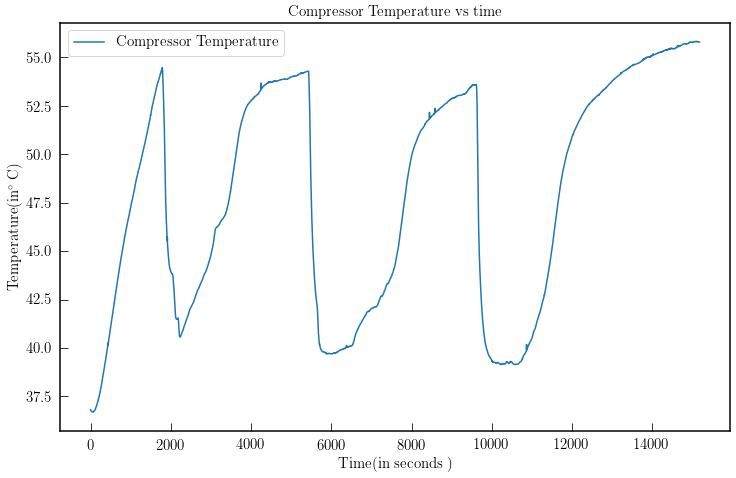

In [14]:
temp =[]
#temp_1=[];
#temp_2=[];
#temp_3=[];
temp_4=[];
for i in range(len(x[1])):
    #temp_1.append(PQMS_RTD_formula(float(y[1][i])));
    #temp_2.append(PQMS_RTD_formula(float(y[2][i])));
    #temp_3.append(PQMS_RTD_formula(float(y[3][i])));
    temp_4.append(PQMS_RTD_formula(float(y[4][i])));

#temp.append(temp_1);
#temp.append(temp_2);
#temp.append(temp_3);
temp.append(temp_4);

t = array(temp);
plt.plot(x[1],temp[0] , label = '$\mathrm{ Compressor \ Temperature }$' );
plt.title('$\mathrm{Compressor\ Temperature\ vs \ time}$')
plt.xlabel('$\mathrm{Time(in \ seconds \ ) }$')
plt.ylabel('$\mathrm{Temperature(in ^{\circ}\ C)}')
plt.legend(loc='best');
plt.savefig('day7_comp_temp.png');
